In [57]:
#Import required libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#libraries for visualiziong Decision Trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [58]:
#Load Data
file_loc = 'C:\\Users\\TJ\\Documents\\Denver\\GitHub\\TheZoen\\Data\\trial_last\\all.xlsx'
df = pd.read_excel(file_loc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210143 entries, 0 to 52565
Data columns (total 7 columns):
temp        210143 non-null float64
wind        210143 non-null float64
rain        210143 non-null float64
humi        210143 non-null float64
dew         210143 non-null float64
snow        210143 non-null float64
accident    210143 non-null int64
dtypes: float64(6), int64(1)
memory usage: 12.8 MB


In [59]:
# df = df.iloc[:, [2,3,9,10,11,12,13,14]]

In [60]:
# #Feature Selection
# #Split dataset in feature and target variable
# feature_idx = df.columns[2:7]
# feature_idx #Index(['total.Humi', 'total.temp', 'total.wind', 'total.rain', 'total.dew'], dtype='object')

# features = list(feature_idx)
# features #['total.Humi', 'total.temp', 'total.wind', 'total.rain', 'total.dew']
# causes = list(df.Cause.unique())
# causes #['일반조난', '산악기타', '실족추락', '개인질환', '암벽등반', '탈진탈수', '저체온증', '낙석낙빙']

In [63]:
X = df.iloc[:,:5]
Y = df.accident
features = list(df.columns[:5])
print(features) #['temp', 'wind', 'rain', 'humi', 'dew']
# accident = list(df.accident.unique())
# print(accident) #[0, 1]
accident = ['0', '1']
# print(accident) #['0', '1']
X.head()

['temp', 'wind', 'rain', 'humi', 'dew']


temp  wind  rain  humi   dew
0 -5.35  1.50  0.00  70.0 -9.85
1 -5.75  1.35  0.00  71.5 -9.85
2 -2.95  1.50  0.00  69.5 -6.15
3 -0.25  2.30  0.25  70.5 -3.45
4  0.80  3.90  0.00  69.5 -2.25

In [64]:
#Splitting Data
#split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [65]:
#Build Decision Tree Model

#create decision Tree classifer object
clf = DecisionTreeClassifier()
#Train decision Tree classifer
clf = clf.fit(X_train, Y_train)
#predict the response for test dataset
Y_pred = clf.predict(X_test)

In [66]:
#Evaluate Model
#Model Accuracy, how often is the classifier correct?
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.8367463477309138


In [67]:
# #Visualize Decision Trees
# dot_data = StringIO()
# export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
#                 feature_names = features, class_names = accident)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('decisionTree.png')
# Image(graph.create_png())

In [68]:
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [69]:
#분류기 이름 -> (선스타일, 분류기 인스턴스)
Class_Map = {'logistic':('-', LogisticRegression()),
            'Naive':('_', GaussianNB()),
            'DecisionTree':('--', DecisionTreeClassifier(max_depth = 5)),
            'RandomForest':(':', RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1))}

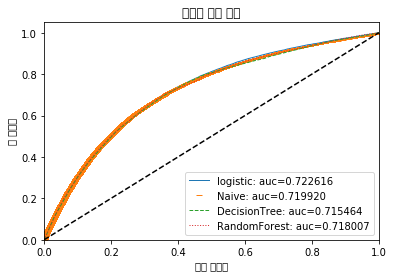

In [70]:
# 데이터프레임의 행을 train/test set으로 나눔
X, Y = df[df.columns[:5]], (df['accident'] == 1)
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .8)
# '_', '-', '--', ':'
for name, (line_fmt, model) in Class_Map.items():
    model.fit(X_train, Y_train)
    #열마다 T, F값 저장
    preds = model.predict_proba(X_test)
    pred = pd.Series(preds[:,1])
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    auc_score = auc(fpr, tpr)
    label = '%s: auc=%f' %(name, auc_score)
    plt.plot(fpr, tpr, line_fmt, linewidth = 1, label = label)

plt.legend(loc="lower right")
plt.title("뷴류기 성능 비교")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('거짓 양성비')
plt.ylabel('참 양성비')
plt.show()
    

In [71]:
# https://scikit-learn.org/stable/modules/tree.html

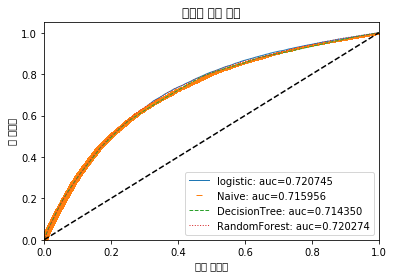

In [72]:
#데이터프레임의 행을 train/test set으로 나눔
X, Y = df[df.columns[:5]], (df['accident'] == 1)
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .7)
# '_', '-', '--', ':'
for name, (line_fmt, model) in Class_Map.items():
    model.fit(X_train, Y_train)
    #열마다 T, F값 저장
    preds = model.predict_proba(X_test)
    pred = pd.Series(preds[:,1])
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    auc_score = auc(fpr, tpr)
    label = '%s: auc=%f' %(name, auc_score)
    plt.plot(fpr, tpr, line_fmt, linewidth = 1, label = label)

plt.legend(loc="lower right")
plt.title("뷴류기 성능 비교")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('거짓 양성비')
plt.ylabel('참 양성비')
plt.show()
    

In [84]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features =1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.9104084948436788


In [74]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 6)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.9098714488684645


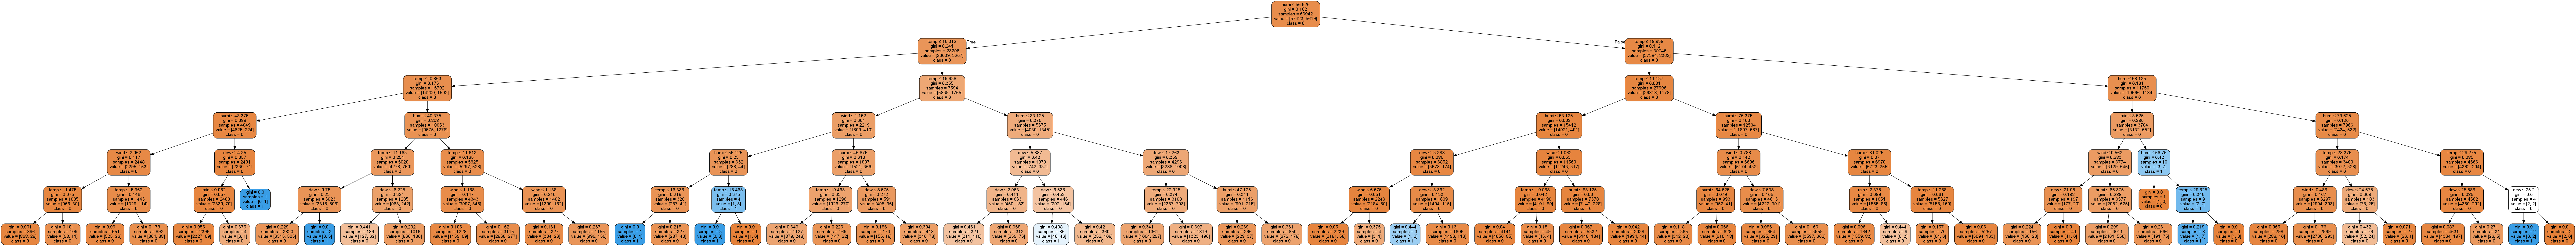

In [75]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [76]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.9102657357869763


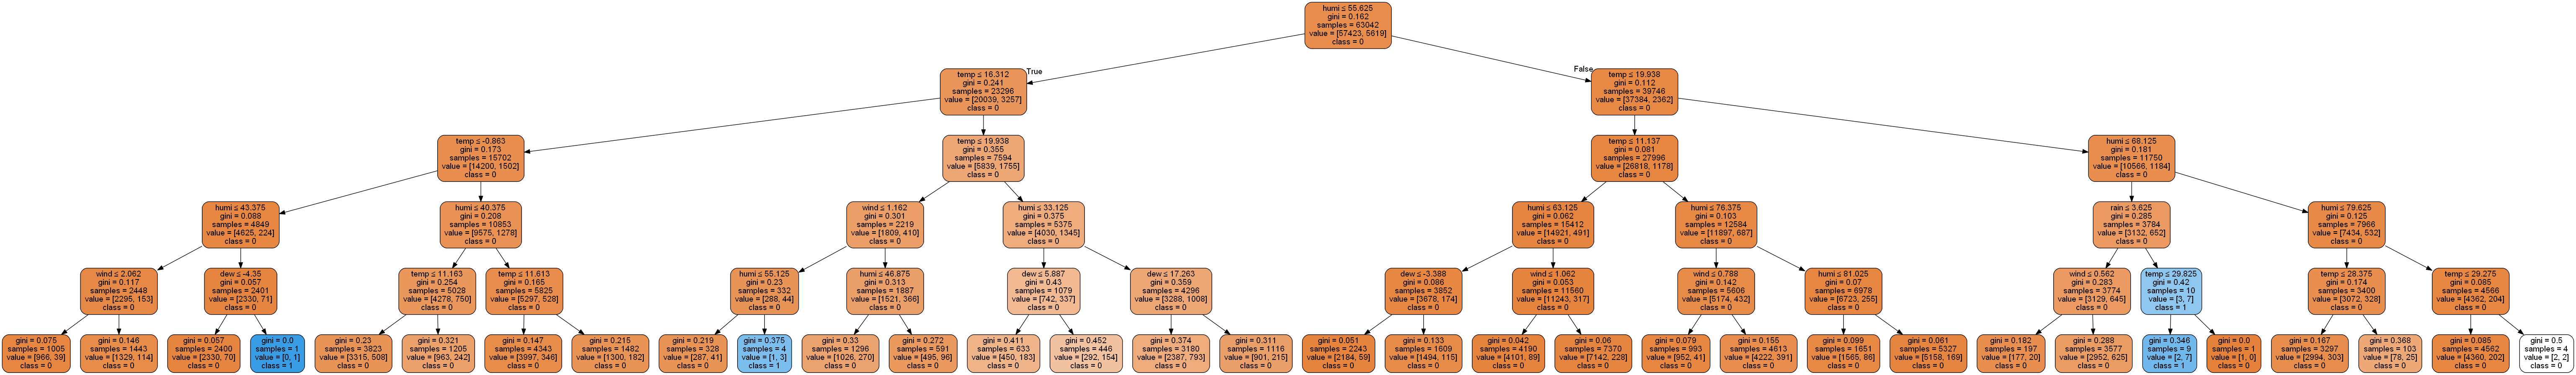

In [77]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.9103201201895297


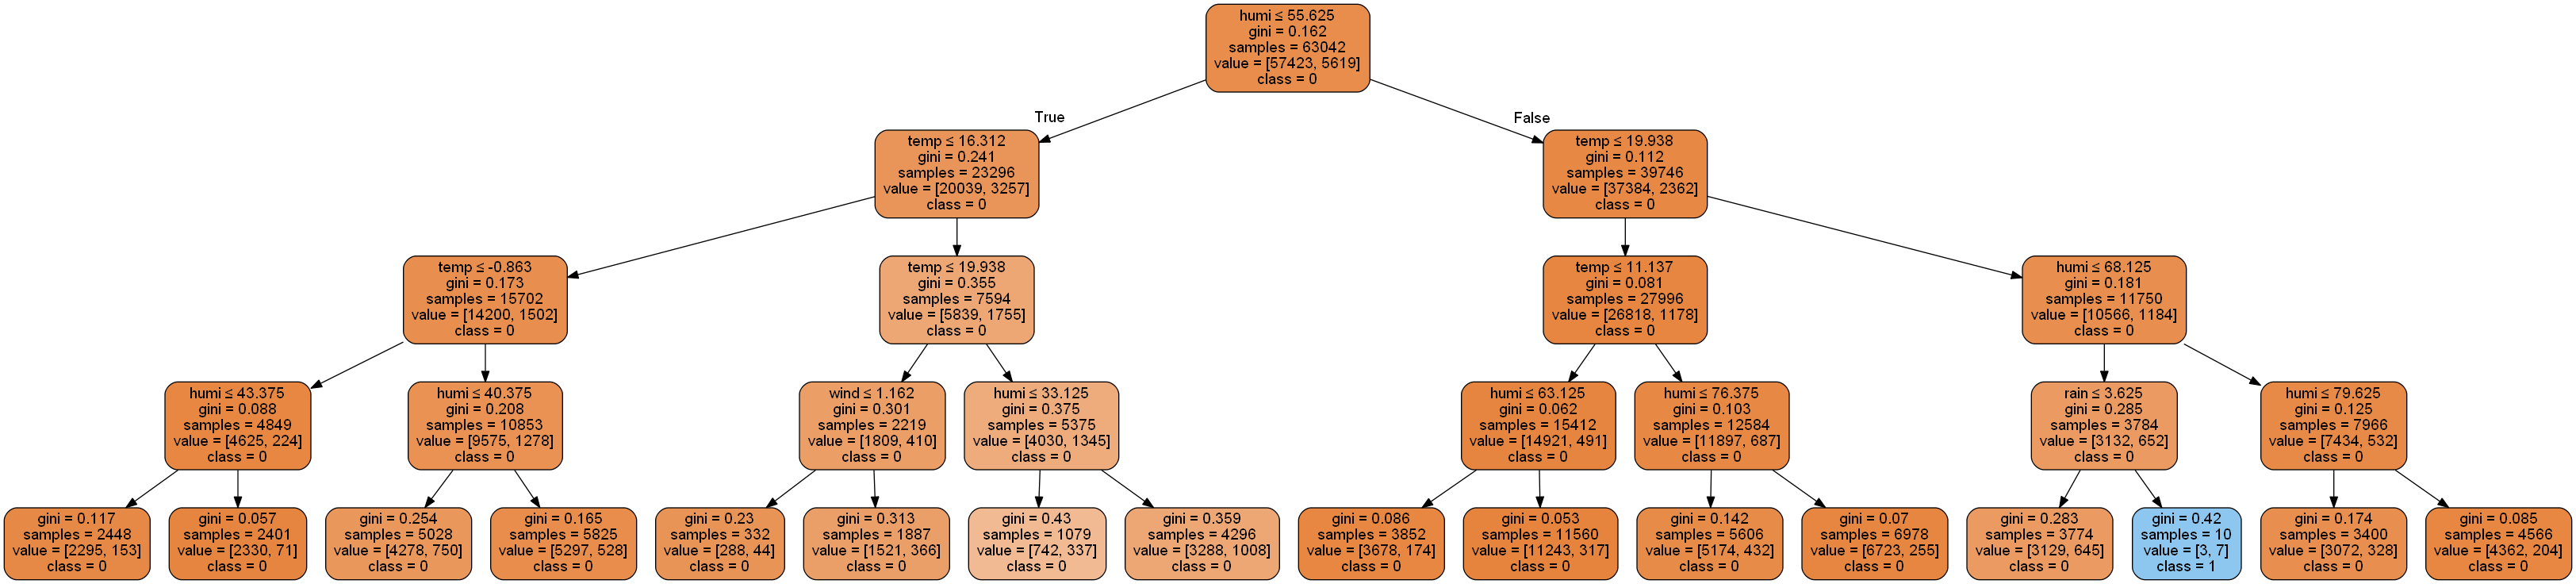

In [79]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [80]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.9104084948436788


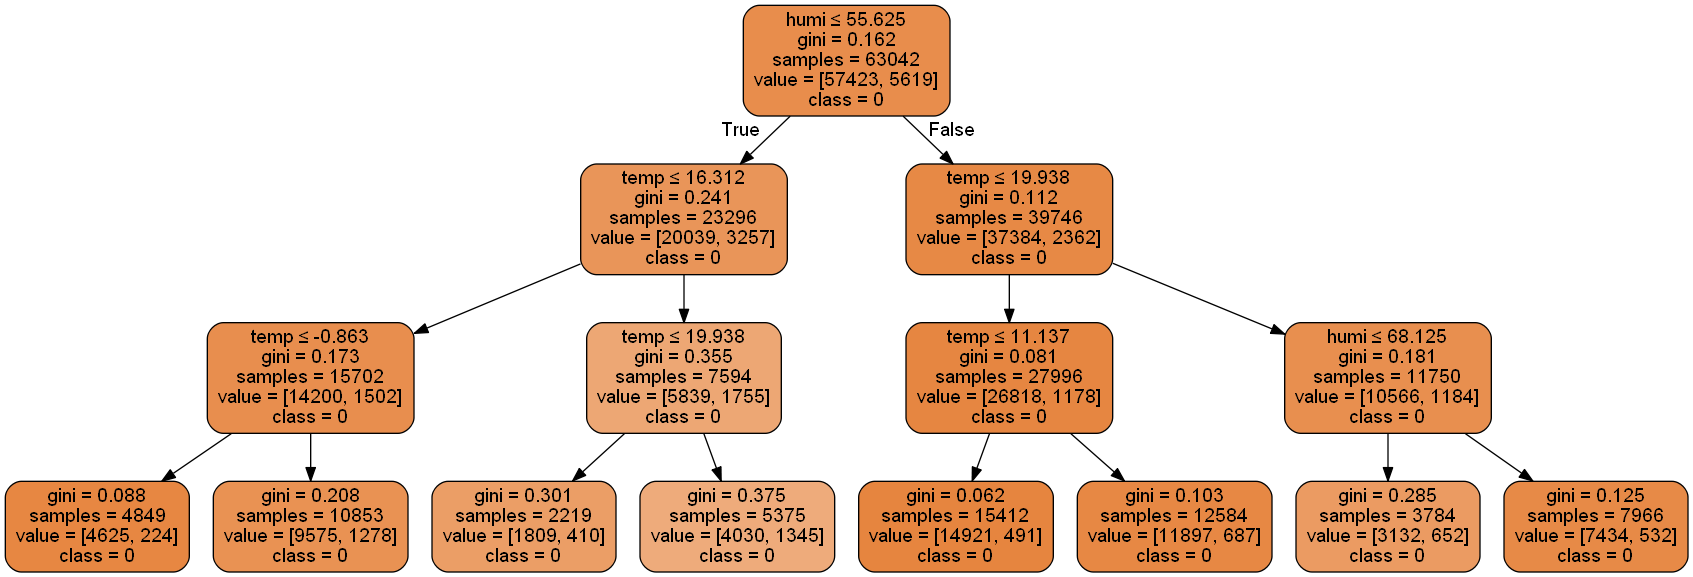

In [81]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [82]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy :  0.9104084948436788


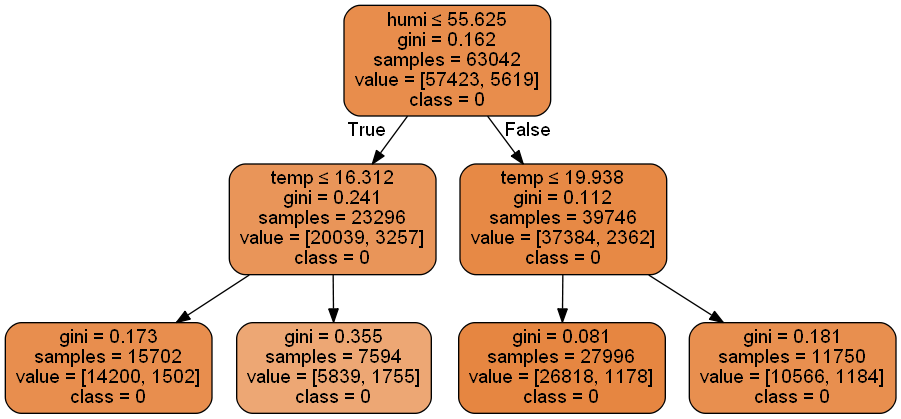

In [83]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Accuracy :  0.9094159794970802


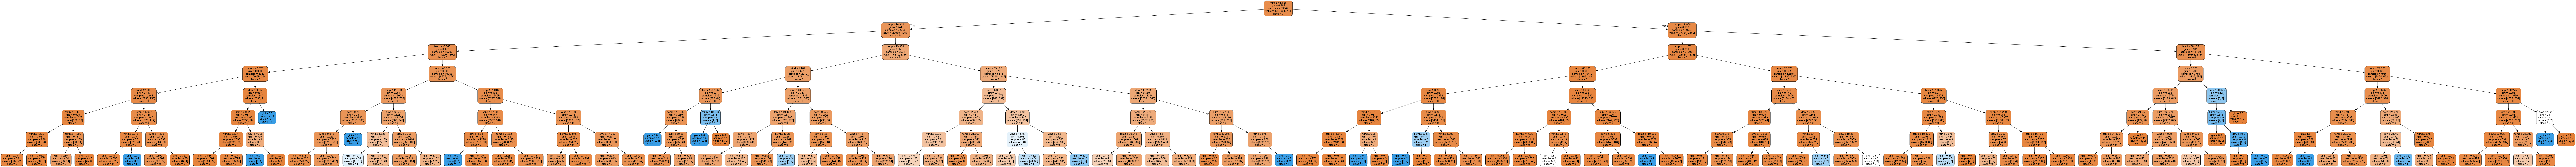

In [85]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 7)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(Y_test, Y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True,
                feature_names = features, class_names = accident)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())